In [77]:
#import statement:

import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [78]:

# reading csv files
df = pd.read_csv('Applications.csv')
df.head()

,suite,name,links,topic,description,total_codeLines,PL,fortranLines,cLines,cppLines,...,dd,loc_dd,proc_sch,loc_sch,storage,v,rd1,rd1-year,nv,rd2
0,Chatterbug,chatterbug,https://github.com/hpcgroup/chatterbug,Mimic of Communication Patterns,A suite of communication-intensive proxy appli...,1056,C++,0,0,1056,...,replicated,?,static,unstr-mesh.c[86-94],0.156,1,-,-,no,-
1,CORAL-2,Kripke,https://github.com/LLNL/Kripke,MD,"Kripke is a simple, scalable, 3D Sn determinis...",5350,C++,0,0,2471,...,distributed,PartionSpace.cpp[75-123],static,PartitionSpace.cpp,0.420,1.2.4,6/14/19,2019,no,-
2,CORAL-2,TeaLeaf,https://github.com/CEED/Laghos,SPH: Gas dynamics,Laghos (LAGrangian High-Order Solver) is a min...,8230,C++,0,0,7494,...,replicated,?,dynamic,Loadbalance.f90[,0.928,3.1,4/10/21,2021,no,-
3,ExaGraph,miniVite,https://github.com/Exa-Graph/miniVite,Community Detection - Louvain method,miniVite is a proxy app that implements a sing...,2429,C++,0,0,195,...,distributed,graph.hpp [367-377],dynamic,graph.hpp [from 980 onwards?],0.148,1.2,4/10/21,2021,no,-
4,ExMatEx,ASPA-master,https://github.com/exmatex/ASPA/tree/master/doc,Adaptive Sampling,The purpose of ASPA (Adaptive Sampling Proxy A...,29119,C++,0,0,12956,...,replicated,MPI.cc,static,MPI.cc,5.500,master,1/23/14,2014,no,-


# Plot 1

### Correcting 'Topic' column values

In [79]:
## Correcting 'Topic' column values
df['topic']=df['topic'].replace(['Artificial Intelligence '],'AI')
df['topic']=df['topic'].replace(['AI: Deep Learning'],'AI')
df['topic']=df['topic'].replace(['MD: Method of Characteristics'],'MD')
df['topic']=df['topic'].replace(['MD: Visualization'],'MD')
df['topic']=df['topic'].replace(['MD: NeuroScience Simulations'],'MD')
df['topic']=df['topic'].replace(['SPH: Gas dynamics'],'SPH')
df['topic']=df['topic'].replace(['SPH: Astrophysics'],'SPH')
df['topic']=df['topic'].replace(['SPH: Atmospheric and Ocean physics'],'SPH')
df['topic']=df['topic'].replace(['SPH: Geodynamics'],'SPH')
df['topic']=df['topic'].replace(['CFD-DEM framework'],'CFD')
df['topic']=df['topic'].replace(['Partial Differential equations'],'PDE')
df['topic']=df['topic'].replace(['PDE - Navier Stokes'],'PDE')
df['topic']=df['topic'].replace(['PDE - Stencil Calculation'],'PDE')




In [80]:
df1 = df

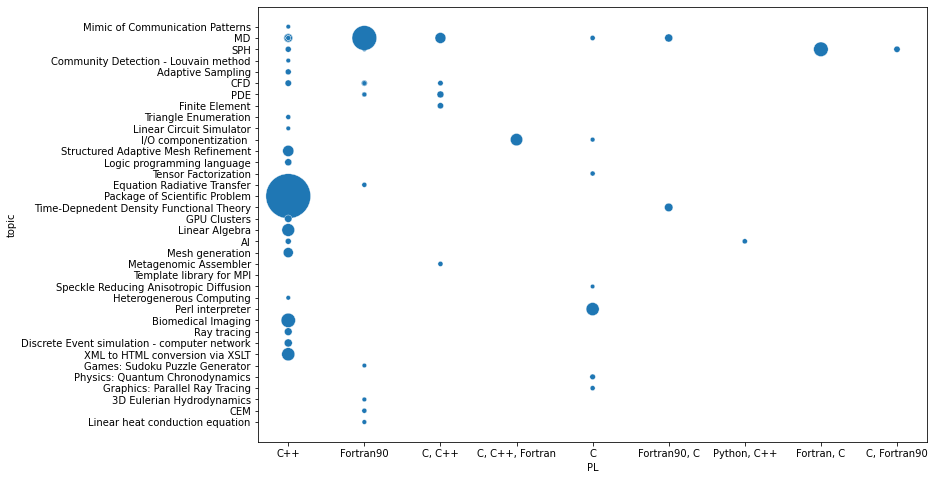

In [81]:
# Control figure size for this notebook:
plt.rcParams['figure.figsize'] = [12, 8]

 
# use the scatterplot function to build the bubble map
sns.scatterplot(data=df1, y="topic", x="PL", size="total_codeLines", legend=False, sizes=(20, 2000))

# show the graph
plt.show()

## Removing rows with dirty data in rd1.

In [82]:
# Storing a copy of df in df2 for further plots
df2 = df
df2.shape

(67, 26)

In [83]:
df =df2
df.shape

(67, 26)

In [84]:
df = df[df.rd1.notnull()]
df = df[df.rd1 != '-']
df = df[df.rd1 != 'no']

In [85]:
df.shape,df.rd1.unique()

((47, 26),
 array(['6/14/19', '4/10/21', '1/23/14', '10/31/14', '7/18/18', '11/23/21',
        '11/22/17', '10/24/17', '7/6/16', '4/18/18', '8/31/19', '7/19/18',
        '7/31/18', '8/19/19', '9/5/18', '8/6/20', '4/26/21', '10/13/20',
        '7/22/20', '7/20/20', '1/26/22', '4/21/22', '3/15/19', '3/14/18',
        '2017', '3/16/07', '4/11/07', '2/2/07', '1/17/05', '2/5/07',
        '2/6/07', '9/3/09', '4/20/09', '6/2/15'], dtype=object))

In [86]:
df.reset_index()

,index,suite,name,links,topic,description,total_codeLines,PL,fortranLines,cLines,...,dd,loc_dd,proc_sch,loc_sch,storage,v,rd1,rd1-year,nv,rd2
0,1,CORAL-2,Kripke,https://github.com/LLNL/Kripke,MD,"Kripke is a simple, scalable, 3D Sn determinis...",5350,C++,0,0,...,distributed,PartionSpace.cpp[75-123],static,PartitionSpace.cpp,0.420,1.2.4,6/14/19,2019,no,-
1,2,CORAL-2,TeaLeaf,https://github.com/CEED/Laghos,SPH,Laghos (LAGrangian High-Order Solver) is a min...,8230,C++,0,0,...,replicated,?,dynamic,Loadbalance.f90[,0.928,3.1,4/10/21,2021,no,-
2,3,ExaGraph,miniVite,https://github.com/Exa-Graph/miniVite,Community Detection - Louvain method,miniVite is a proxy app that implements a sing...,2429,C++,0,0,...,distributed,graph.hpp [367-377],dynamic,graph.hpp [from 980 onwards?],0.148,1.2,4/10/21,2021,no,-
3,4,ExMatEx,ASPA-master,https://github.com/exmatex/ASPA/tree/master/doc,Adaptive Sampling,The purpose of ASPA (Adaptive Sampling Proxy A...,29119,C++,0,0,...,replicated,MPI.cc,static,MPI.cc,5.500,master,1/23/14,2014,no,-
4,5,Fiber Mini App,ntchemini,https://github.com/fiber-miniapp/ntchem-mini,MD,NTChem is a high-performance software package ...,6571,Fortran90,6571,0,...,Replicated,?,static,util_initmpi.f90 [96-124],39.000,1.2,10/31/14,2014,no,-
5,6,LLNL ASC Proxy Apps,Lulesh,https://github.com/LLNL/LULESH,CFD,"LULESH is a highly simplified application, har...",12798,C++,0,0,...,distributed cubic mesh,lulesh-init.cc [189 - 238],dynamic,lulesh-init.cc [377-484],4.400,2.0.2,7/18/18,2018,no,-
6,7,Mantevo,miniAMR,https://github.com/Mantevo/miniAMR,PDE,miniAMR applies a stencil calculation on a uni...,54312,"C, C++",0,4850,...,distributed,init.c,static,init.c,1.100,1.7,11/23/21,2021,no,-
7,9,Mantevo,miniFE,https://github.com/Mantevo/miniFE/releases,Finite Element,MiniFE is an proxy application for unstructure...,36812,"C, C++",0,4479,...,distributed,BoxPartitionIB.c : box_partition,static,BoxPartionIB.c,21.000,2.2,11/22/17,2017,no,-
8,10,Mantevo,miniSMAC,https://github.com/Mantevo/miniSMAC/releases,PDE,Solves the finite-differenced 2D incompressibl...,11167,Fortran90,10984,0,...,distributed,hint in smac2d.f [536-546],static,hint in smac2d.f [536-546],0.812,1,10/24/17,2017,no,-
9,11,Mantevo,miniTri,https://github.com/Mantevo/miniTri,Triangle Enumeration,miniTri is a proxy for a class of triangle bas...,9517,C++,0,0,...,distributed,CSRMatrix.cc[1053-1096],dynamic,CSRMatrix.cpp [1105-1203],1.200,2.0.0,7/6/16,2016,no,-


In [87]:
df["rd1-year"]

1     2019
2     2021
3     2021
4     2014
5     2014
6     2018
7     2021
9     2017
10    2017
11    2016
12    2016
14    2018
16    2019
18    2018
19    2018
20    2019
22    2018
24    2020
26    2021
27    2020
28    2020
29    2020
30    2022
36    2022
42    2019
43    2018
46    2017
47    2017
48    2017
49    2017
50    2017
51    2017
52    2017
53    2017
54    2017
55    2007
56    2007
57    2007
58    2005
59    2007
60    2007
61    2009
62    2009
63    2007
64    2007
65    2009
66    2015
Name: rd1-year, dtype: object

In [88]:
df["rd1-year"].unique()

array(['2019', '2021', '2014', '2018', '2017', '2016', '2020', '2022',
       '2007', '2005', '2009', '2015'], dtype=object)

In [89]:
df['rd1-year'] = pd.to_numeric(df['rd1-year'])
df["rd1-year"].unique()

array([2019, 2021, 2014, 2018, 2017, 2016, 2020, 2022, 2007, 2005, 2009,
       2015])

In [90]:
df.columns

Index(['suite', 'name', 'links', 'topic', 'description', 'total_codeLines',
       'PL', 'fortranLines', 'cLines', 'cppLines', 'C_CPP_H_Lines', 'OpenMP',
       'MPI', 'OpenACC', 'CUDA', 'OpenCL', 'dd', 'loc_dd', 'proc_sch',
       'loc_sch', 'storage', 'v', 'rd1', 'rd1-year', 'nv', 'rd2'],
      dtype='object')

In [91]:
df[['MPI','OpenACC','CUDA','OpenCL','OpenMP']].head()

,MPI,OpenACC,CUDA,OpenCL,OpenMP
1,yes,no,no,no,no
2,yes,no,no,no,no
3,yes,no,no,no,yes
4,yes,no,no,no,no
5,yes,no,no,no,yes


In [92]:
df.head(10)

,suite,name,links,topic,description,total_codeLines,PL,fortranLines,cLines,cppLines,...,dd,loc_dd,proc_sch,loc_sch,storage,v,rd1,rd1-year,nv,rd2
1,CORAL-2,Kripke,https://github.com/LLNL/Kripke,MD,"Kripke is a simple, scalable, 3D Sn determinis...",5350,C++,0,0,2471,...,distributed,PartionSpace.cpp[75-123],static,PartitionSpace.cpp,0.420,1.2.4,6/14/19,2019,no,-
2,CORAL-2,TeaLeaf,https://github.com/CEED/Laghos,SPH,Laghos (LAGrangian High-Order Solver) is a min...,8230,C++,0,0,7494,...,replicated,?,dynamic,Loadbalance.f90[,0.928,3.1,4/10/21,2021,no,-
3,ExaGraph,miniVite,https://github.com/Exa-Graph/miniVite,Community Detection - Louvain method,miniVite is a proxy app that implements a sing...,2429,C++,0,0,195,...,distributed,graph.hpp [367-377],dynamic,graph.hpp [from 980 onwards?],0.148,1.2,4/10/21,2021,no,-
4,ExMatEx,ASPA-master,https://github.com/exmatex/ASPA/tree/master/doc,Adaptive Sampling,The purpose of ASPA (Adaptive Sampling Proxy A...,29119,C++,0,0,12956,...,replicated,MPI.cc,static,MPI.cc,5.500,master,1/23/14,2014,no,-
5,Fiber Mini App,ntchemini,https://github.com/fiber-miniapp/ntchem-mini,MD,NTChem is a high-performance software package ...,6571,Fortran90,6571,0,0,...,Replicated,?,static,util_initmpi.f90 [96-124],39.000,1.2,10/31/14,2014,no,-
6,LLNL ASC Proxy Apps,Lulesh,https://github.com/LLNL/LULESH,CFD,"LULESH is a highly simplified application, har...",12798,C++,0,0,11296,...,distributed cubic mesh,lulesh-init.cc [189 - 238],dynamic,lulesh-init.cc [377-484],4.400,2.0.2,7/18/18,2018,no,-
7,Mantevo,miniAMR,https://github.com/Mantevo/miniAMR,PDE,miniAMR applies a stencil calculation on a uni...,54312,"C, C++",0,4850,18017,...,distributed,init.c,static,init.c,1.100,1.7,11/23/21,2021,no,-
9,Mantevo,miniFE,https://github.com/Mantevo/miniFE/releases,Finite Element,MiniFE is an proxy application for unstructure...,36812,"C, C++",0,4479,3549,...,distributed,BoxPartitionIB.c : box_partition,static,BoxPartionIB.c,21.000,2.2,11/22/17,2017,no,-
10,Mantevo,miniSMAC,https://github.com/Mantevo/miniSMAC/releases,PDE,Solves the finite-differenced 2D incompressibl...,11167,Fortran90,10984,0,0,...,distributed,hint in smac2d.f [536-546],static,hint in smac2d.f [536-546],0.812,1,10/24/17,2017,no,-
11,Mantevo,miniTri,https://github.com/Mantevo/miniTri,Triangle Enumeration,miniTri is a proxy for a class of triangle bas...,9517,C++,0,0,7779,...,distributed,CSRMatrix.cc[1053-1096],dynamic,CSRMatrix.cpp [1105-1203],1.200,2.0.0,7/6/16,2016,no,-


### Changing types of methodoligies

In [93]:
df = df.replace({'MPI': {'yes': 1, 'no': 0}})
df = df.replace({'OpenACC': {'yes': 1, 'no': 0}})
df = df.replace({'CUDA': {'yes': 1, 'no': 0}})
df = df.replace({'OpenCL': {'yes': 1, 'no': 0}})
df = df.replace({'OpenMP': {'yes': 1, 'no': 0}})
df.OpenMP.unique()

array([0, 1])

In [94]:
df[['MPI','OpenACC','CUDA','OpenCL','OpenMP']].head()

,MPI,OpenACC,CUDA,OpenCL,OpenMP
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,1
4,1,0,0,0,0
5,1,0,0,0,1


In [95]:
df.columns

Index(['suite', 'name', 'links', 'topic', 'description', 'total_codeLines',
       'PL', 'fortranLines', 'cLines', 'cppLines', 'C_CPP_H_Lines', 'OpenMP',
       'MPI', 'OpenACC', 'CUDA', 'OpenCL', 'dd', 'loc_dd', 'proc_sch',
       'loc_sch', 'storage', 'v', 'rd1', 'rd1-year', 'nv', 'rd2'],
      dtype='object')

In [96]:
df["MPI_new"] = ""
df["OpenACC_new"] = ""
df["CUDA_new"] = ""
df["OpenCL_new"] = ""
df["OpenMP_new"] = ""

In [97]:
df_s =df
df_s.head()

,suite,name,links,topic,description,total_codeLines,PL,fortranLines,cLines,cppLines,...,v,rd1,rd1-year,nv,rd2,MPI_new,OpenACC_new,CUDA_new,OpenCL_new,OpenMP_new
1,CORAL-2,Kripke,https://github.com/LLNL/Kripke,MD,"Kripke is a simple, scalable, 3D Sn determinis...",5350,C++,0,0,2471,...,1.2.4,6/14/19,2019,no,-,,,,,
2,CORAL-2,TeaLeaf,https://github.com/CEED/Laghos,SPH,Laghos (LAGrangian High-Order Solver) is a min...,8230,C++,0,0,7494,...,3.1,4/10/21,2021,no,-,,,,,
3,ExaGraph,miniVite,https://github.com/Exa-Graph/miniVite,Community Detection - Louvain method,miniVite is a proxy app that implements a sing...,2429,C++,0,0,195,...,1.2,4/10/21,2021,no,-,,,,,
4,ExMatEx,ASPA-master,https://github.com/exmatex/ASPA/tree/master/doc,Adaptive Sampling,The purpose of ASPA (Adaptive Sampling Proxy A...,29119,C++,0,0,12956,...,master,1/23/14,2014,no,-,,,,,
5,Fiber Mini App,ntchemini,https://github.com/fiber-miniapp/ntchem-mini,MD,NTChem is a high-performance software package ...,6571,Fortran90,6571,0,0,...,1.2,10/31/14,2014,no,-,,,,,


In [98]:
df = df_s

## Creating new Columns with name of technologies

In [100]:

for row in df.index:
        if df['MPI'][row] == 1 : 
            df.at[row,'MPI_new'] = 'MPI,'
        if df['OpenACC'][row] == 1 :    df.at[row,'OpenACC_new'] = 'OpenACC,'
        if df['CUDA'][row] == 1 :    df.at[row,'CUDA_new'] = 'CUDA,'
        if df['OpenCL'][row] == 1 :    df.at[row,'OpenCL_new'] = 'OpenCL,'
        if df['OpenMP'][row] == 1 :    df.at[row,'OpenMP_new'] = 'OpenMP'
        


In [101]:
df['technologies'] = df[df.columns[-5:]].apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1
)
df['technologies']

1                               MPI,
2                               MPI,
3                         MPI,OpenMP
4                               MPI,
5                         MPI,OpenMP
6            MPI,OpenACC,CUDA,OpenMP
7                         MPI,OpenMP
9                    MPI,CUDA,OpenMP
10                        MPI,OpenMP
11                        MPI,OpenMP
12                         MPI,CUDA,
14                              MPI,
16                              MPI,
18                        MPI,OpenMP
19                        MPI,OpenMP
20                            OpenMP
22                        MPI,OpenMP
24                   MPI,CUDA,OpenMP
26    MPI,OpenACC,CUDA,OpenCL,OpenMP
27    MPI,OpenACC,CUDA,OpenCL,OpenMP
28                        MPI,OpenMP
29                        MPI,OpenMP
30                         MPI,CUDA,
36                         MPI,CUDA,
42                   MPI,CUDA,OpenMP
43                              MPI,
46                                  
4

In [102]:
df.columns[-5:]

Index(['OpenACC_new', 'CUDA_new', 'OpenCL_new', 'OpenMP_new', 'technologies'], dtype='object')

In [103]:
df[['MPI_new','OpenACC_new','CUDA_new','OpenCL_new','OpenMP_new']]

,MPI_new,OpenACC_new,CUDA_new,OpenCL_new,OpenMP_new
1,"MPI,",,,,
2,"MPI,",,,,
3,"MPI,",,,,OpenMP
4,"MPI,",,,,
5,"MPI,",,,,OpenMP
6,"MPI,","OpenACC,","CUDA,",,OpenMP
7,"MPI,",,,,OpenMP
9,"MPI,",,"CUDA,",,OpenMP
10,"MPI,",,,,OpenMP
11,"MPI,",,,,OpenMP


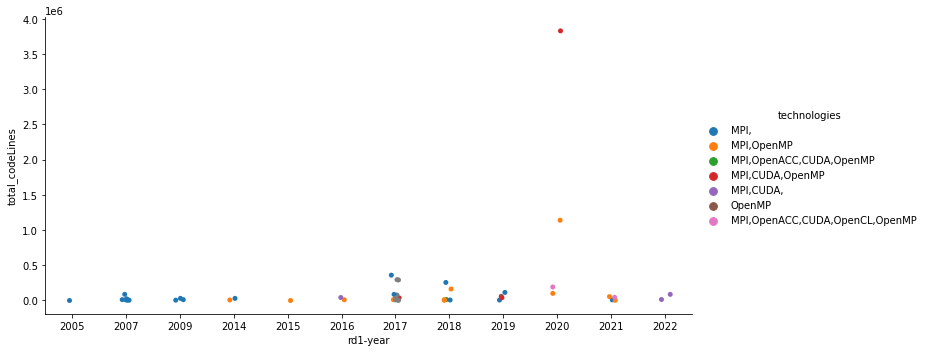

In [104]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.catplot(x="rd1-year", y="total_codeLines", hue="technologies", data=df,height=5, aspect=2)
# show the graph
plt.show()

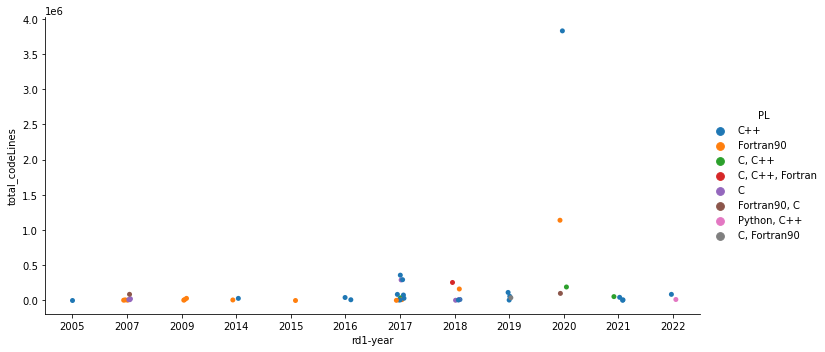

In [105]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.catplot(x="rd1-year", y="total_codeLines", hue="PL", data=df,height=5, aspect=2)
# show the graph
plt.show()

## Correcting 'dd' column values

In [106]:
df = df[df.dd.notnull()]
df['dd']=df['dd'].replace(['-'],'no')
df = df[df.dd != '?']
df['dd']=df['dd'].replace(['centralized?'],'centralized')
df['dd']=df['dd'].replace(['Replicated'],'replicated')
df['dd']=df['dd'].replace(['distributed cubic mesh'],'distributed')
df['dd']=df['dd'].replace(['replicated?'],'replicated')

In [107]:
df.shape, df.dd.unique()

((44, 32),
 array(['distributed', 'replicated', 'no', 'centralized'], dtype=object))

### Correcting scheduling values

In [117]:
df['proc_sch']=df['proc_sch'].replace(['static?'],'static')
df = df[df.proc_sch != '-']
df = df[df.proc_sch.notnull()]


In [119]:
df.shape,df.proc_sch.unique()

((33, 32), array(['static', 'dynamic', 'shared'], dtype=object))

In [110]:
df[['MPI','OpenACC','CUDA','OpenCL','OpenMP']]

,MPI,OpenACC,CUDA,OpenCL,OpenMP
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,1
4,1,0,0,0,0
5,1,0,0,0,1
6,1,1,1,0,1
7,1,0,0,0,1
9,1,0,1,0,1
10,1,0,0,0,1
11,1,0,0,0,1


In [111]:
df['dd'].unique()

array(['distributed', 'replicated', 'no', 'centralized'], dtype=object)

In [122]:
df = pd.get_dummies(df, prefix=None, dummy_na=False, columns=['dd','proc_sch'], sparse=False, drop_first=False, dtype=None)

In [123]:
df.columns

Index(['suite', 'name', 'links', 'topic', 'description', 'total_codeLines',
       'PL', 'fortranLines', 'cLines', 'cppLines', 'C_CPP_H_Lines', 'OpenMP',
       'MPI', 'OpenACC', 'CUDA', 'OpenCL', 'loc_dd', 'loc_sch', 'storage', 'v',
       'rd1', 'rd1-year', 'nv', 'rd2', 'MPI_new', 'OpenACC_new', 'CUDA_new',
       'OpenCL_new', 'OpenMP_new', 'technologies', 'dd_centralized',
       'dd_distributed', 'dd_replicated', 'proc_sch_dynamic',
       'proc_sch_shared', 'proc_sch_static'],
      dtype='object')

In [124]:
df_3 = df[['MPI','OpenACC','CUDA','OpenCL','OpenMP','dd_centralized','dd_distributed', 'dd_replicated', 'proc_sch_dynamic',
       'proc_sch_shared', 'proc_sch_static']]
df_3.index =df['name']
df_3.head()

,MPI,OpenACC,CUDA,OpenCL,OpenMP,dd_centralized,dd_distributed,dd_replicated,proc_sch_dynamic,proc_sch_shared,proc_sch_static
name,,,,,,,,,,,
Kripke,1,0,0,0,0,0,1,0,0,0,1
TeaLeaf,1,0,0,0,0,0,0,1,1,0,0
miniVite,1,0,0,0,1,0,1,0,1,0,0
ASPA-master,1,0,0,0,0,0,0,1,0,0,1
ntchemini,1,0,0,0,1,0,0,1,0,0,1


Text(0, 0.5, 'Frequency')

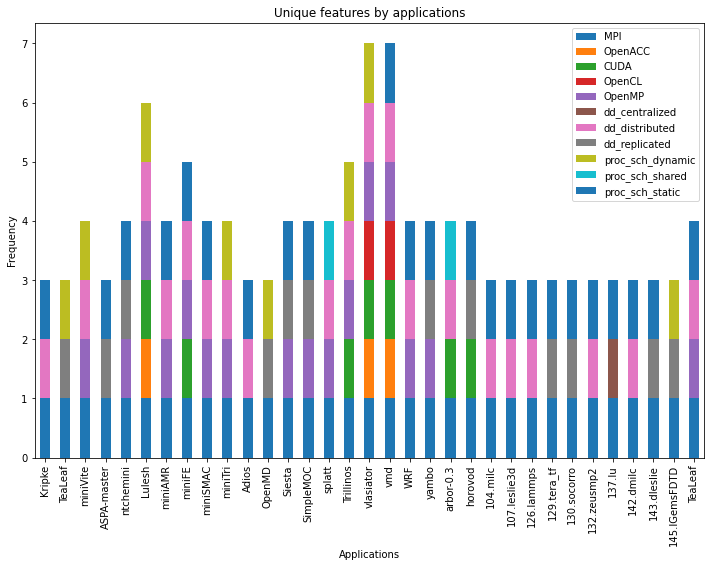

In [126]:

df_3.plot(kind="bar",stacked=True)
plt.title("Unique features by applications")
plt.xlabel("Applications")
plt.ylabel("Frequency")

<AxesSubplot:xlabel='MPI_new,OpenACC_new,CUDA_new,OpenCL_new'>

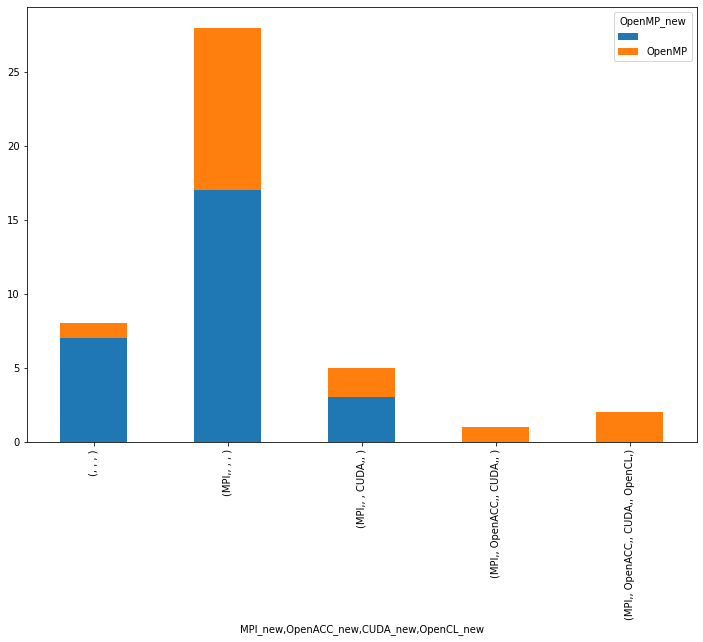

In [115]:
df.groupby(['MPI_new','OpenACC_new','CUDA_new','OpenCL_new','OpenMP_new']).size().unstack() \
           .plot( kind='bar', stacked=True)
          

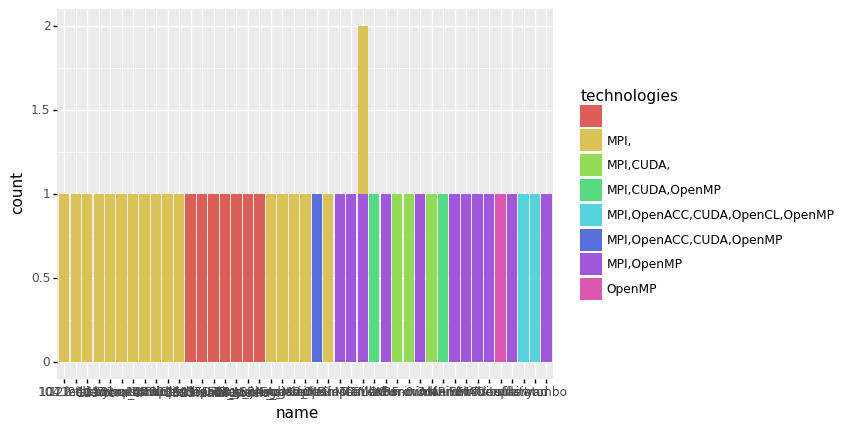

<ggplot: (8780591099573)>

In [116]:
ggplot(df, aes(x='name', fill = 'technologies')) + \
    geom_bar(stat = 'count')